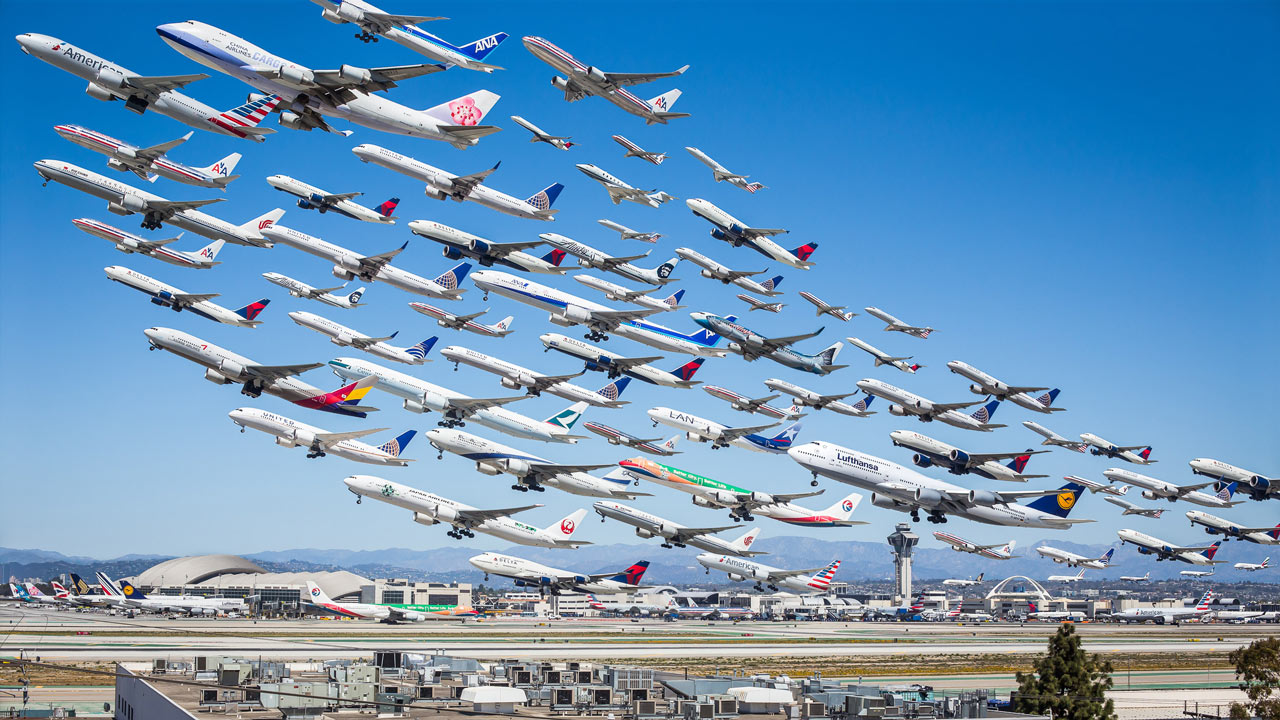

# Charting New Heights:
## Perspective on Aircraft Investment & Risk Mitigation

## Overview

This project analyzes airplane accident data in order to determine which aircraft(s) are the lowest risk to begin a new business endeavor: operating private and commercial airplanes. The undisclosed company will be able to use this data to decide which aircraft will be their first investment.

## Business Understanding

A company is looking to invest in airplanes, and would like to know which airplanes would be the lowest risk to branch out to offering commercial and private travel options.

## Data Understanding

Accident data from the National Transportation Safety Board (NTSB) was used and analyzed. Each accident has an associated unique ID. The data file provides type of aircraft, severity of accident, damage to aircraft, and other characteristics involved with accidents.


In [1]:
# Imports here
import pandas as pd 
import numpy as np
df = pd.read_csv('Data/Aviation_Data.csv')
df

C:\Users\kpegg\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
df.info()
# looking at the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [3]:
df.head()
# Looking at the actual data & columns

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df['Total.Fatal.Injuries'].value_counts()
# counts of Fatal Injuries

0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
31.0         1
169.0        1
150.0        1
117.0        1
156.0        1
Name: Total.Fatal.Injuries, Length: 125, dtype: int64

In [5]:
df['Make'].value_counts()
# Looking at names of makes

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
Patin                    1
GATES LEARJET            1
VALLDEJULI JOHN A        1
Continental Mk5a         1
CLIFTON                  1
Name: Make, Length: 8237, dtype: int64

In [6]:
df['Total.Uninjured'].value_counts()
# Count of Uninjured per incident

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [7]:
#represent ~ 14% of data 
df['Total.Fatal.Injuries'].isna().sum()

12860

In [8]:
#represent ~ 15% of data 
df['Total.Serious.Injuries'].isna().sum()

13969

In [9]:
##represent ~ 14% of data 
df['Total.Minor.Injuries'].isna().sum()

13392

In [10]:
df['Total.Uninjured'].isna().sum()
# Looking at the amount of NA values

7371

In [11]:
df['Event.Date'].isna().sum()
# More N/A values

1459

In [12]:
df.duplicated().value_counts()
# looking at how duplicate incidents

False    88958
True      1390
dtype: int64

## Data Preparation

Our team begins the data cleaning process by investigating the values in the dataset, reviewing the data frame, and then we identify and focus on relevant elements. Then we remove the duplicates, normalize strings, and apply necessary filters to ensure consistency. The subsequent analyses are conducted on this refined dataset, enhancing data quality and facilitating meaningful insights.

In [13]:
#Dropping unecessary columns
columns_to_drop_na = ['Injury.Severity','Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Date', 'Report.Status']
df.dropna(subset=columns_to_drop_na, inplace=True)

In [14]:
# Removing the duplicates values
df.drop_duplicates(inplace=True)

In [15]:
df['Make'].value_counts()
# Rechecking value counts

Cessna          17868
Piper            9694
CESSNA           3881
Beech            3379
PIPER            2256
                ...  
Murphey             1
Hurd/drifter        1
McClish             1
Ferran              1
CLIFTON             1
Name: Make, Length: 6441, dtype: int64

In [16]:
df['Make'] = df['Make'].str.capitalize()
df['Make'].value_counts()
# capitalizing Makes

Cessna                  21749
Piper                   11950
Beech                    4167
Bell                     1990
Boeing                   1314
                        ...  
Alexander volksplane        1
Bastian                     1
Troutman                    1
Kaminskas                   1
Nelson sydney               1
Name: Make, Length: 5955, dtype: int64

In [17]:
#creating the year column
df['Year'] = df['Event.Date'].str[:4]
print(df['Year'])

0        1948
1        1962
3        1977
6        1981
7        1982
         ... 
90098    2022
90106    2022
90120    2022
90194    2022
90226    2022
Name: Year, Length: 67887, dtype: object


In [18]:
df.shape
# Checking the shape of the dataframe

(67887, 32)

In [19]:
df['Aircraft.Category'].value_counts()
# Checking the count of the different aircrafts

Airplane             19089
Helicopter            2141
Glider                 371
Balloon                177
Weight-Shift           151
Gyrocraft              130
Powered Parachute       87
Ultralight              19
Unknown                  5
Powered-Lift             1
Rocket                   1
Blimp                    1
WSFT                     1
Name: Aircraft.Category, dtype: int64

In [20]:
# dropping all other rows that do not have value of Airplane
df = df[df['Aircraft.Category'] == 'Airplane']

In [21]:
df['Aircraft.Category'].value_counts()
# checking counts again

Airplane    19089
Name: Aircraft.Category, dtype: int64

In [22]:
# first lets determine the total of the overall Injuries
df['Total.Injuries'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Injuries']


<ipython-input-22-71d943d1c5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total.Injuries'] = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
<ipython-input-22-71d943d1c5bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Injuries']


In [23]:
df['Total.Injuries'].describe()


count    19089.000000
mean         0.795641
std          3.231691
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        228.000000
Name: Total.Injuries, dtype: float64

In [25]:
# A few (read: many) examples of data cleaning
df['Make']=df['Make'].replace("Rockwell int't", "Rockwell Intl")
df['Make']=df['Make'].replace('Rockwell international', "Rockwell Intl")
df['Make']=df['Make'].replace('Rockwell', "Rockwell Intl")
df['Make']=df['Make'].replace('Rockwell comdr', "Rockwell Intl")
df['Make']=df['Make'].replace('Rockwell commander', "Rockwell Intl")
df['Make']=df['Make'].replace("Douglas", "Mcdonnell Douglas")
df['Make']=df['Make'].replace("Mcdonnell douglas", "Mcdonnell Douglas")
df['Make']=df['Make'].replace('Mcdonnell-douglas', "Mcdonnell Douglas")
df['Make']=df['Make'].replace('Bombardier inc', "Bombardier")
df['Make']=df['Make'].replace("Bombardier, inc.", "Bombardier")
df['Make']=df['Make'].replace("Cessna aircraft co", 'Cessna')
df['Make']=df['Make'].replace("Cessna aircraft company", 'Cessna')
df['Make']=df['Make'].replace("Cessna aircraft", 'Cessna')
df['Make']=df['Make'].replace("Gulfstream aerospace", 'Gulfstream')
df['Make']=df['Make'].replace("Gulfstream-schweizer a/c corp", 'Gulfstream')
df['Make']=df['Make'].replace("Gulfstream american corp", 'Gulfstream')
df['Make']=df['Make'].replace("Gulfstream-schweizer", 'Gulfstream')
df['Make']=df['Make'].replace('Gulfstream american', "Gulfstream")
df['Make']=df['Make'].replace("Czech aircraft works spol sro", 'Czech aircraft')
df['Make']=df['Make'].replace("Czech sport aircraft as", 'Czech aircraft')
df['Make']=df['Make'].replace("zech aircraft works", 'Czech aircraft')
df['Make']=df['Make'].replace("Learjet inc", "Learjet")
df['Make']=df['Make'].replace("Gates learjet corp.", "Learjet")
df['Make']=df['Make'].replace('Gates learjet', "Learjet")
df['Make']=df['Make'].replace("The boeing company", "Boeing")
df['Make']=df['Make'].replace("Boeing stearman", "Boeing")
df['Make']=df['Make'].replace('Smith mini', "Smith")
df['Make']=df['Make'].replace('Smith aerostar', "Smith")
df['Make']=df['Make'].replace('Smith miniplane', "Smith")
df['Make']=df['Make'].replace('Ted smith', "Smith")

<ipython-input-25-50a7a88672f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make']=df['Make'].replace("Rockwell int't", "Rockwell Intl")
<ipython-input-25-50a7a88672f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make']=df['Make'].replace('Rockwell international', "Rockwell Intl")
<ipython-input-25-50a7a88672f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [26]:
# exported the CSV
df.to_csv('Airplane_data.csv')

## Analysis and Results

This project used Tableau for data analysis. This showed an overview of trends of airplane accidents over time and injured vs. uninjured in accidents per make.

We found that the percentages of uninjured per make when involved in an accident. Cessna made up about 47% of the data, which points to Cessna being the safest if involved in an accident. Piper & Boeing are the next two largest values with 26% and 7% respectively.

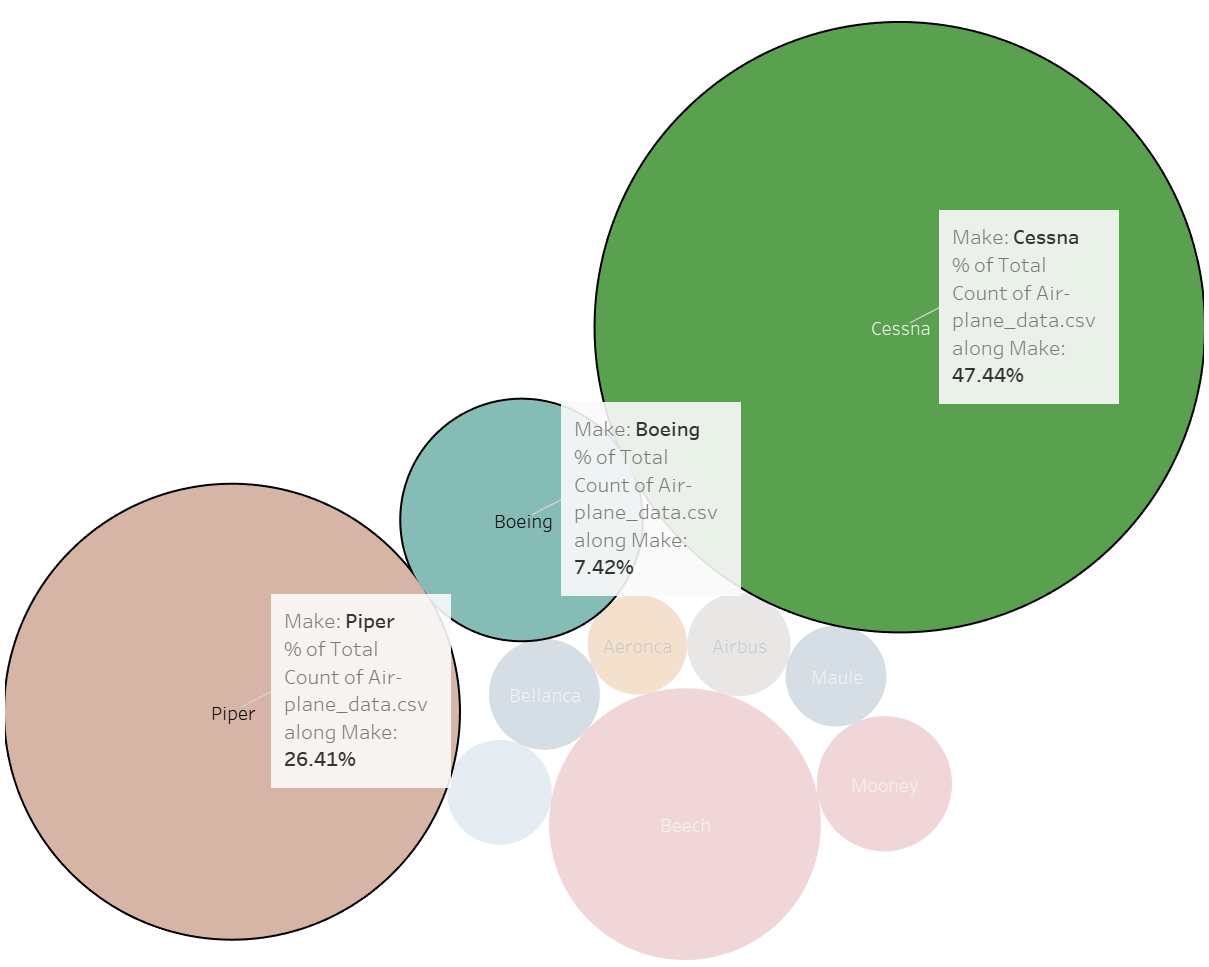

This bubble chart shows the percentages of uninjured per make when involved in an accident. Cessna made up about 47% of the data, which points to Cessna being the safest if involved in an accident. Piper & Boeing are the next two largest values with 26% and 7% respectively.

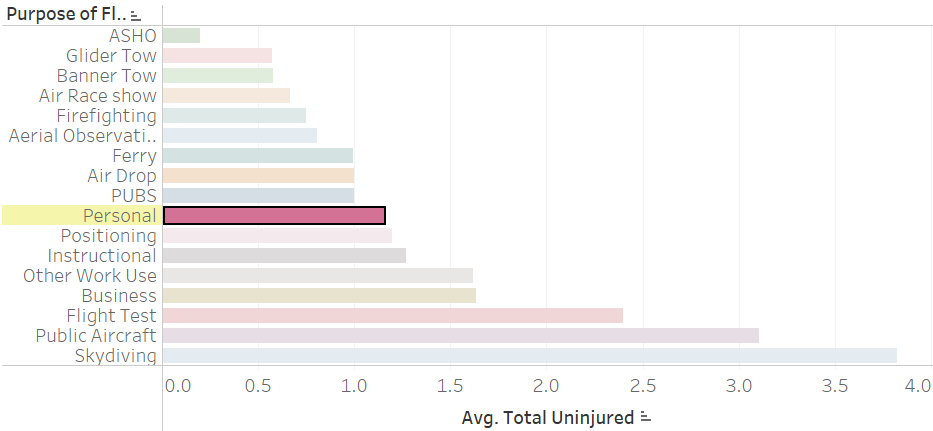

Through our data we also found that personal flights have a relatively low average of uninjured passengers when involved in an accident and can conclude that this may be a good sector to enter in the beginnings of our endeavor. This bar chart shows the average uninjured when compared to purpose of flight. Personal flights have a relatively low average of uninjured passengers when involved in an accident


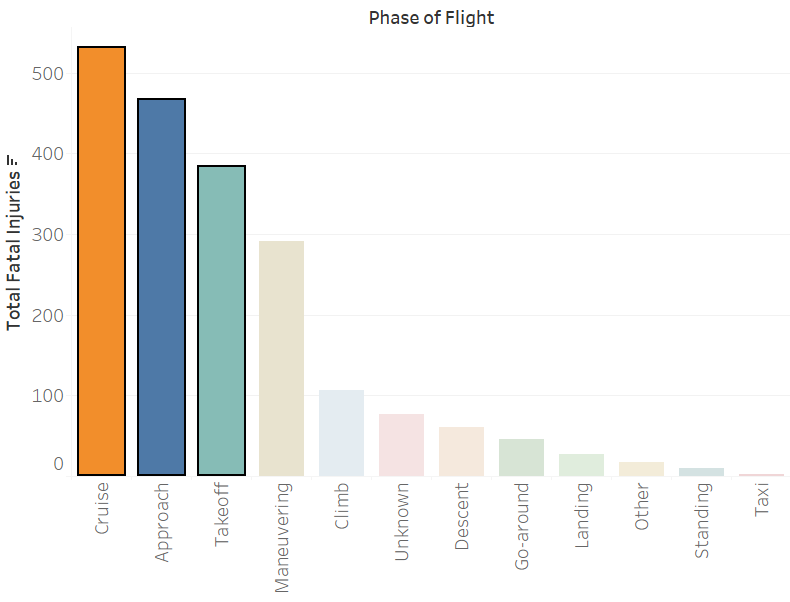

We see through our data that the highest risk phase of flight are cruise, approach, and takeoff. This gives insight into where additional training and safety measures should be put in place.

### Business Recommendation 1

For smaller airplanes, invest in Cessna or Piper: Cessna through our conclusions would hold 47% representation in the data and a notable percentage of uninjured passengers when involved in accidents.

### Business Recommendation 2

For larger airplanes, invest in Boeing,a s a global force in producing larger commercial and cargo airplanes such as the 737,747 and 777.  Boeing seems to be able to provide a wide variety of options that would fill any need possible for use in tis sector.

### Business Recommendation 3

Based on our insights into critical flight phases, we recognize the need for a focus on communication, intense training initiatives, and strategic investments in oversight. Prioritizing continuous monitoring systems and establishing a robust process for ongoing education are necessary components of our commitment to enhancing operational excellence and safety.

## Conclusion

Through a comprehensive analysis of aviation accident data spanning various makes, flight types, and phases, we have derived insights that can guide strategic decisions for our aviation endeavor.  The data-driven findings provide valuable perspective on safety, risk factors and potential opportunities within the aviation industry.

Cessna being a safe option for private travel as the planes are smaller and still the top choice as far as safety is concerned, with consideration for Boeing in the event that the company decides to go into larger aviation sector.

Exploring the personal flights category our analysis concluded that this sector has a relatively low average of uninjured passengers in accidents with the greatest potential for mainstream use. 

Our findings underscore the importance of adopting a holistic appraoch to safety.  By considering both aircraft makes and specific flight phases, we can tailor saftey measures and training programs to address the unique challenges associated with different scenarios.


### Next Steps

- Find return on investment comparing smaller & larger airplanes for our company’s entrance into the market

- Develop & implement extra training programs at high-risk flight phase points

- Further Analysis: Cost of repair or replacement, occurrence of accidents & why (pilot error, engine failure, etc.), and investigate airplanes equipped with extra safety features to protect our investment and the passengers aboard.